# Unsupervised Learning

Unsupervised learning is a type of machine learning where the algorithm learns from unlabeled data, meaning that the data does not have explicit target labels or outputs associated with it. In unsupervised learning, the goal is to explore the inherent patterns, relationships, and structures within the data without the guidance of labeled examples.

## K-Means Clustering

K-means clustering is a form of supervised learning that aims to find k clusters. It does this, similar to the supervised learning algorithms, by first plotting all the values as points within some multidimensional vector space. Then we initialise k randomly placed 'centroids' within the vector space and assign each of the data points to the nearest centroid. Then, in the next iteration, we place each centroid at the average location of all the data points assigned to it. Then all the dots are assigned to the nearest centroid again and the process is repeated until convegence.

## K-Means Clustering Example

### Importing the Libraries

First, the libraries need to be imported. If you don't have these libraries installed, run 
```
pip install numpy
pip install matplotlib
pip install pandas
pip install scikit-learn
```
in terminal. 

In [62]:
import numpy as np; # Makes arrays and applies array wide functions on the dataset.
import pandas as pd; # Used for dealing with dataset(s).
import matplotlib.pyplot as plt; # Makes the graphs/scatter plot and trendline.
import sklearn; # Performs the complex mathematics required for some parts of the code making the process of programming the ai much less laborious.
from sklearn.cluster import KMeans; # Get the algorithm for k-means clustering.
from sklearn import datasets; # Import a set of example datasets for ease of use.

In [63]:
wine = datasets.load_wine(); # Get the built-in dataset about types of wine to use as an example.

print(list(wine.feature_names)); # Print all the variable names in case I want to reference them later or use some of them for the graph at the end.

X = sklearn.preprocessing.scale(wine.data); # Scale the dataset and standardise it along one axis.

y = pd.DataFrame(wine.target); # Create a DataFrame based on the target values for the wine dataset.
variable_names = wine.feature_names; # Make a duplicate list of the variable names.

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [64]:
# Suppress memory leak warning:
import os; 
os.environ['OMP_NUM_THREADS'] = '1'; 


### Training the AI

The AI can now be trained on the data to find k clusters as accurately as possible by convergence.

In [65]:
# Cluster the data
clustering = KMeans(n_clusters=3, n_init=10, random_state=5); # Sets the number of centroids and randomizes centroid positions to begin with.
clustering.fit(X); # Iterates through the model using the dataset to improve the accuracy until convergence.

### Plotting the Outputs

Here we can plot the data and compare the k-means clustering groups to the ground truth comparison data. This allows us to judge how effective and how accurate the model is.

In [66]:
wine_df = pd.DataFrame(wine.data); # Create a DataFrame for the wine data.
wine_df.columns = wine.feature_names; # Define column names for the new DataFrame.
y.columns = ["Targets"]; # Change the old DataFrame column names to just "Targets".

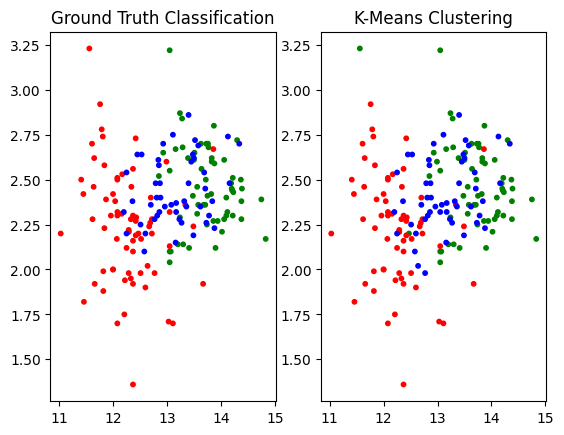

In [67]:
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64); # Set the clustering labels and colours.

plt.subplot(1,2,1); # Seperates the scatter plots so they don't overlap.

color_theme = np.array(['blue', 'green', 'red']); # Define colours to be used in the graphs to separate the different clusters.

plt.scatter(x=wine_df.alcohol, y=wine_df.ash, c=color_theme[wine.target - 2], s=10); # Alcohol along the x-axis and ash along the y-axis and subtract 2 from the colour theme to reverse it and make the colours more similar to the k-means clustering graph.
plt.title("Ground Truth Classification"); # Title the ground truth graph to serve as a reference point for the k-means clustering graph.

plt.subplot(1,2,2); # Seperates the scatter plots so they don't overlap.
plt.scatter(x=wine_df.alcohol, y=wine_df.ash, c=color_theme[clustering.labels_], s=10);  # Plot alcohol along the x-axis and ash along the y-axis and colour code each of the clusters to differentiate them.
plt.title("K-Means Clustering"); # Title the k-means clustering graph.

### Accuracy

Now that the algorithm has been tested we can see the accuracy, precision and associated values. Closer to 1 is better for all of these values and the support column just shows the number of point that are supporting that value. Otherwise, you can refer to the image/table below to interpret the accuracy and precision results.

![Interpret Accuracy](..\assets\images\InterpretAccuracy.png)

In [68]:
print(sklearn.metrics.classification_report(y, relabel)); # Print a table of all the various accuracy values.

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.92      0.96        71
           2       0.94      1.00      0.97        48

    accuracy                           0.97       178
   macro avg       0.96      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178

